#TITANIC DATASET:

The Titanic dataset contains detailed information about the passengers of the RMS Titanic, which tragically sank on its maiden voyage after colliding with an iceberg on April 15, 1912. This dataset is often employed in classification tasks, aiming to predict passenger survival based on various attributes.

### Key Features of the Titanic Dataset:

1. **PassengerId**: Unique identifier for each passenger.
2. **Survived**: Survival status (0 = No, 1 = Yes) indicating whether the passenger survived the disaster.
3. **Pclass**: Passenger's class (1 = 1st, 2 = 2nd, 3 = 3rd), which serves as a proxy for socio-economic status.
4. **Name**: Full name of the passenger, which can be used to extract titles and infer family relations.
5. **Sex**: Gender of the passenger (male or female).
6. **Age**: Age of the passenger in years. Some values may be missing and require imputation.
7. **SibSp**: Number of siblings and spouses the passenger had aboard the Titanic.
8. **Parch**: Number of parents and children the passenger had aboard the Titanic.
9. **Ticket**: Ticket number, which can provide insights into the socio-economic status and travel groupings.
10. **Fare**: Amount of money the passenger paid for the ticket, which also indicates socio-economic status.
11. **Cabin**: Cabin number, which can be used to deduce the passenger's location on the ship. This field has many missing values.
12. **Embarked**: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton), indicating the port where the passenger boarded the ship.



### Problem Statement

**Objective:**
Conduct a comprehensive Exploratory Data Analysis (EDA) of the Titanic dataset to uncover patterns, relationships, and insights that help in understanding the factors influencing passenger survival.

**Goals:**
1. **Data Cleaning and Preparation:**
   - Identify and handle missing values in the dataset.
   - Convert categorical features to appropriate numerical formats if necessary.
   - Create new features (feature engineering) that may provide additional insights.

2. **Descriptive Statistics and Visualization:**
   - Summarize the dataset using descriptive statistics to understand the central tendencies and dispersion of features.
   - Visualize the distribution of key features such as Age, Fare, and Pclass.
   - Visualize the relationship between different features and survival rate using plots such as bar charts, histograms, and box plots.

3. **Univariate Analysis:**
   - Analyze individual features to understand their distribution and characteristics.
   - Identify any outliers and decide on appropriate treatments.

4. **Bivariate and Multivariate Analysis:**
   - Examine the relationships between pairs of features and their combined influence on survival.
   - Use heatmaps, pair plots, and correlation matrices to visualize these relationships.

5. **Segmentation and Patterns:**
   - Segment the data based on features such as Pclass, Sex, Age, and Embarked to uncover patterns in survival rates.
   - Identify any significant differences in survival rates across different passenger groups.

6. **Insights and Conclusions:**
   - Summarize the key findings from the analysis.
   - Draw conclusions about the factors that most strongly influenced survival on the Titanic.
   - Discuss any limitations of the dataset and the analysis.

### Deliverables:
- A detailed report or Jupyter notebook containing:
  - Steps of data cleaning and preparation.
  - Descriptive statistics and visualizations.
  - Univariate, bivariate, and multivariate analyses.
  - Key insights and conclusions drawn from the analysis.

### Example Questions to Explore:
- How does the survival rate vary with passenger class (Pclass)?
- What is the age distribution of the passengers, and how does age relate to survival?
- Are there differences in survival rates between males and females?
- How does the number of siblings/spouses (SibSp) or parents/children (Parch) aboard affect survival?
- Does the port of embarkation (Embarked) influence the chances of survival?
- How does the fare paid by passengers correlate with their survival?

### Learning Outcomes:
- Gain proficiency in handling and cleaning real-world data.
- Develop skills in using descriptive statistics and visualizations to understand data.
- Learn to identify and analyze relationships between features.
- Practice drawing meaningful insights and conclusions from data analysis.

This problem statement provides a clear framework for conducting EDA on the Titanic dataset, ensuring that students can systematically explore and analyze the data to derive meaningful insights.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
sns.set(style="whitegrid") # set the background for the graphs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.UNDERSTAND THE DATA

####Reading the csv file titanic.csv in variable


In [ ]:
titanic=pd.read_csv("/content/drive/MyDrive/kapil/Statistics/Descriptive/8.EDA/data/titanic.csv")
dftitanic=titanic.copy()

####Examine the data by looking at the first 5 rows of the data


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.shape

(891, 12)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
# #Observations
# - 5 categorical columns
# - 7 numerical columns

Observations-

- The shape of data is (891,12) means in our data set we have 891 rows and 12 columns. Each row has info about a passenger so totally we have data of 891 passengers.


- In the age column we can see, Out of 891 values, we have 714 non-null values. It implies that we have 177 Null values. ( 891–714 = 177)

- Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge. we have only 23% of values present in the data set and 77% of values are missing so we can drop this feature while making our model.

- Except for age and cabin, any features do not have any null values.

Features: The titanic dataset has roughly the following types of features:

- Categorical/Nominal: Variables that can be divided into multiple categories but having no order or priority.
Eg. Embarked (C = Cherbourg; Q = Queenstown; S = Southampton)
- Binary: A subtype of categorical features, where the variable has only two categories.
Eg: Sex (Male/Female)
- Ordinal: They are similar to categorical features but they have an order(i.e can be sorted).
Eg. Pclass (1, 2, 3)
- Continuous: They can take up any value between the minimum and maximum values in a column.
Eg. Age, Fare
- Count: They represent the count of a variable.
Eg. SibSp, Parch
- Useless: They don’t contribute to the final outcome of an ML model. Here, PassengerId, Name, Cabin and Ticket might fall into this category.

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.Pclass.value_counts()

,count
Pclass,
3,491
1,216
2,184


### Observations from the Summary Statistics of the Titanic Dataset

#### 1. PassengerId
- **Count:** 891 (indicating there are 891 passengers in the dataset)
- **Mean:** 446 (mid-point identifier)
- **Standard Deviation (std):** 257.35 (high variability in PassengerId, but this is expected as it is a unique identifier)
- **Minimum (min):** 1
- **25th Percentile (25%):** 223.5
- **50th Percentile (Median, 50%):** 446
- **75th Percentile (75%):** 668.5
- **Maximum (max):** 891

#### 2. Survived
- **Count:** 891 (same as the total number of passengers)
- **Mean:** 0.38 (about 38% of the passengers survived)
- **Standard Deviation (std):** 0.49 (indicates binary nature, with nearly equal distribution of 0s and 1s)
- **Minimum (min):** 0
- **25th Percentile (25%):** 0
- **50th Percentile (Median, 50%):** 0
- **75th Percentile (75%):** 1
- **Maximum (max):** 1

#### 3. Pclass (Passenger Class)
- **Count:** 891
- **Mean:** 2.31 (indicating more passengers in lower classes, closer to 3)
- **Standard Deviation (std):** 0.84 (moderate spread in class distribution)
- **Minimum (min):** 1 (1st class)
- **25th Percentile (25%):** 2
- **50th Percentile (Median, 50%):** 3 (most passengers are in 3rd class)
- **75th Percentile (75%):** 3
- **Maximum (max):** 3 (3rd class)

#### 4. Age
- **Count:** 714 (indicating missing values for 177 passengers)
- **Mean:** 29.70 years (average age of passengers)
- **Standard Deviation (std):** 14.53 years (wide range of ages)
- **Minimum (min):** 0.42 years (very young passengers)
- **25th Percentile (25%):** 20.13 years
- **50th Percentile (Median, 50%):** 28.0 years
- **75th Percentile (75%):** 38.0 years
- **Maximum (max):** 80.0 years (elderly passengers)

#### 5. SibSp (Number of Siblings/Spouses aboard)
- **Count:** 891
- **Mean:** 0.52 (most passengers did not have many siblings/spouses aboard)
- **Standard Deviation (std):** 1.10
- **Minimum (min):** 0
- **25th Percentile (25%):** 0
- **50th Percentile (Median, 50%):** 0
- **75th Percentile (75%):** 1
- **Maximum (max):** 8

#### 6. Parch (Number of Parents/Children aboard)
- **Count:** 891
- **Mean:** 0.38 (most passengers did not have many parents/children aboard)
- **Standard Deviation (std):** 0.81
- **Minimum (min):** 0
- **25th Percentile (25%):** 0
- **50th Percentile (Median, 50%):** 0
- **75th Percentile (75%):** 0
- **Maximum (max):** 6

#### 7. Fare
- **Count:** 891
- **Mean:** 32.20 (average fare paid by passengers)
- **Standard Deviation (std):** 49.69 (large variability in fares, indicating some passengers paid significantly higher amounts)
- **Minimum (min):** 0 (some passengers did not pay for their tickets)
- **25th Percentile (25%):** 7.91
- **50th Percentile (Median, 50%):** 14.45
- **75th Percentile (75%):** 31.0
- **Maximum (max):** 512.33 (a very high fare paid, likely for first-class luxury accommodations)

These observations provide a summary of the central tendencies, dispersion, and range of values for each column in the Titanic dataset.

##2.DATA CLEANING

In [ ]:
#Check for null values:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


####The columns having null values are: Age, Cabin, Embarked. They need to be filled up with appropriate values later on.

In [ ]:
#Check for duplicates
titanic.duplicated().sum()

0

In [ ]:
#Data Type Correction

titanic.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
#changing it to  object dtype to category  to save memory
# titanic.Ticket=titanic["Ticket"].astype("category")
# titanic.Name=titanic["Name"].astype("category")
# titanic.Sex=titanic["Sex"].astype("category")
# titanic.Cabin=titanic["Cabin"].astype("category")
# titanic.Embarked=titanic["Embarked"].astype("category")


In [ ]:
def convert_object_to_category(df):
    # Select columns with dtype 'object'
    object_cols = df.select_dtypes(include='object').columns

    # Convert each object column to 'category' dtype
    for col in object_cols:
        df[col] = df[col].astype('category')

    return df

In [ ]:
titanic = convert_object_to_category(titanic)

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


##UNIVARIATE ANALYSIS - NUMERICAL COLUMNS

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [ ]:
# Exclude categorical columns
numerical_data = titanic.select_dtypes(include=[np.number])
numerical_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# Summary Statistics
numerical_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Useless: Here, PassengerId, Name, Cabin and Ticket might fall into this category.

### Numerical columns:Distribution Plots

 -  data['numerical_column'].plot.hist(),
 - sns.histplot(data['numerical_column'], kde=True),
 - data['numerical_column'].plot.box(),
 - sns.kdeplot(data['numerical_column'])

In [ ]:
numerical_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

####Univariate Analysis - Age

<Axes: xlabel='Age', ylabel='Count'>

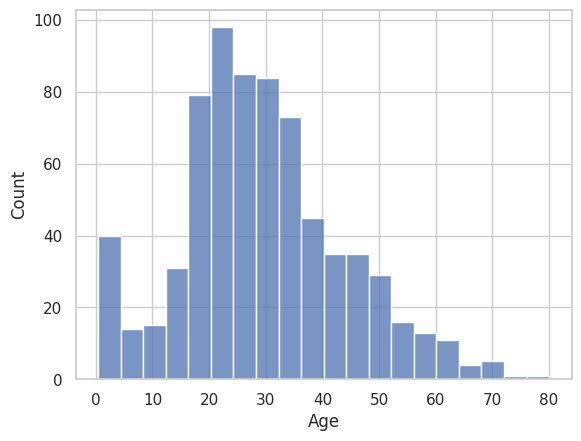

In [ ]:
sns.histplot(data=titanic, x="Age")

<Axes: xlabel='Age'>

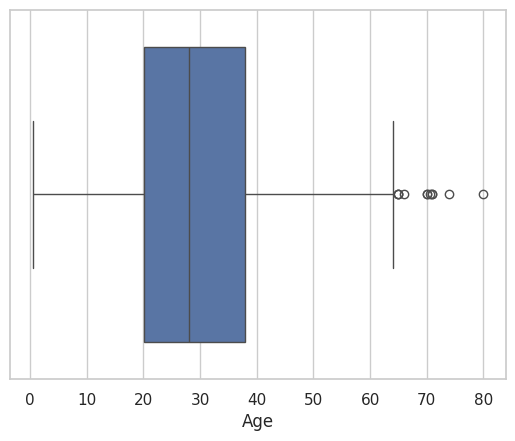

In [ ]:
sns.boxplot(data=numerical_data['Age'], orient='h')

<Axes: xlabel='Age', ylabel='Density'>

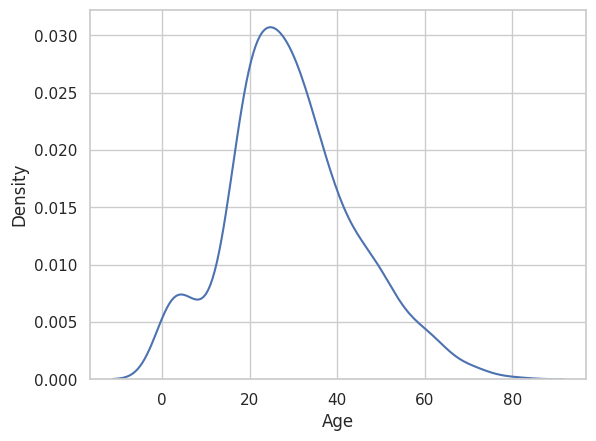

In [ ]:
sns.kdeplot(data=numerical_data['Age'])

### Observations from the Histogram/box/kde of the Age Column:

1. **Distribution Shape:**
   - The distribution of the `Age` column is right-skewed, with a longer tail on the right side. This indicates that most passengers were younger, with fewer older passengers.

2. **Peak Age Group:**
   - The highest count of passengers falls within the age range of approximately 20 to 30 years, with the peak around the mid-20s. This suggests that a significant portion of passengers were young adults.

3. **Age Range:**
   - The ages of passengers range from infants (as young as 0) to elderly individuals (up to 80 years). This wide range indicates a diverse age group among the passengers.

4. **Count of Young Children:**
   - There is a noticeable number of young children (ages 0-5) among the passengers, which is significant and might be relevant for survival analysis or understanding family travel patterns.

5. **Middle-aged and Elderly Passengers:**
   - The count of middle-aged passengers (ages 40-60) decreases gradually.
   - Very few passengers are in the age group of 60-80, indicating that elderly passengers were relatively rare.

6. **Missing Values:**
   - While the histogram doesn't directly show missing values, from the summary statistics, we know that there are missing values in the `Age` column. These missing values are likely excluded from the histogram.

These observations provide a detailed view of the age distribution among Titanic passengers, highlighting key demographic insights that could be useful for further analysis, such as survival rates by age group or family travel patterns.

#### Fare -Univariate analysis

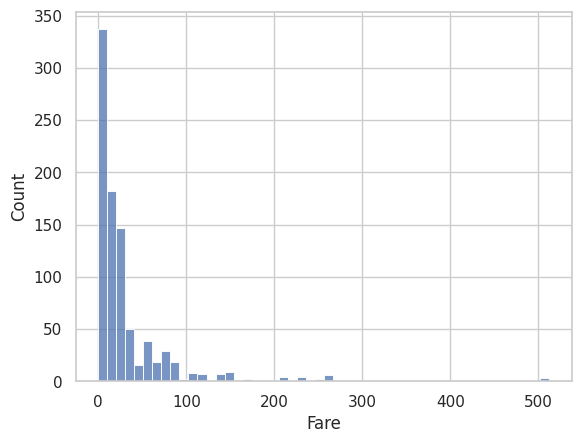

In [ ]:
sns.histplot(data=numerical_data,x ='Fare', bins=50)
plt.show()

<Axes: xlabel='Fare'>

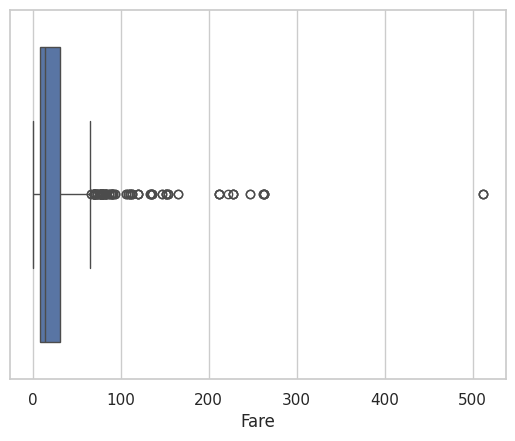

In [ ]:
sns.boxplot(data=numerical_data['Fare'], orient='h')

<Axes: xlabel='Fare', ylabel='Density'>

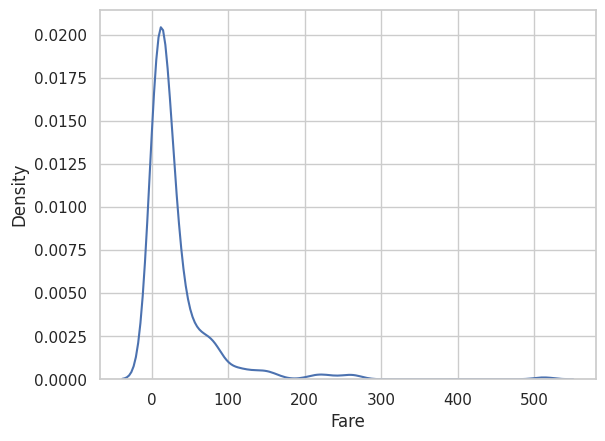

In [ ]:
sns.kdeplot(data=numerical_data['Fare'])

To perform a univariate analysis of the "Fare" column based on the histogram/box/kde provided in the image, we can describe the data's central tendency, dispersion, and shape. Here's a detailed analysis:

### Univariate Analysis of the "Fare" Column

1. **Central Tendency:**
   - **Mean Fare:** The mean fare appears to be on the lower side given the high frequency of lower fare values.
   - **Median Fare:** The median fare is likely very low, as the histogram shows a high count of fares close to 0.

2. **Dispersion:**
   - **Range:** The fares range from close to 0 up to around 500.
   - **Variance and Standard Deviation:** The standard deviation is likely high due to the presence of outliers (fares up to 500).
   - **Interquartile Range (IQR):** A large number of fares are clustered in the lower range, indicating a small IQR.

3. **Shape:**
   - **Skewness:** The distribution is highly right-skewed (positively skewed) as there is a long tail to the right.

4. **Outliers:**
   - There are a significant number of outliers with high fare values, as evidenced by the long tail extending up to around 500.

5. **Mode:**
   - The most common fare value is around 0, as indicated by the highest bar in the histogram.

Overall, the fare data is characterized by a large number of low values, with a few very high values causing a skewed distribution. This indicates that most passengers paid relatively low fares, but there were some who paid significantly higher amounts.


##UNIVARIATE ANALYSIS - CATEGORICAL COLUMN


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [ ]:
titanic.shape

(891, 12)

####Categorical columns - Univariate plots (count plots):
 -  data['categorical_column'].value_counts().plot.bar(),
 -  sns.countplot(x='categorical_column', data=data)

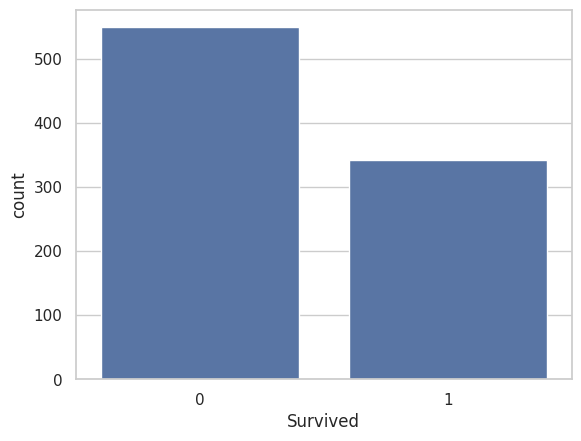

In [ ]:
sns.countplot(x='Survived',data=titanic)
plt.show()

In [ ]:
titanic.Survived.value_counts(), 549/(549+342)

(Survived
 0    549
 1    342
 Name: count, dtype: int64,
 0.6161616161616161)

In [ ]:
titanic['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


From the above graph it is clear that not many persons survived. Out of 891 persons in training dataset only 350, 38.4% of total training dataset survived. We will get more insight of data by exploring more.

Observations-

We can see out of 891 passengers, 549 can not survive in that disaster, And 342 Survived. So the data we have can not be said as imbalanced. neither it is perfectly balanced. it is like ok ok situation.

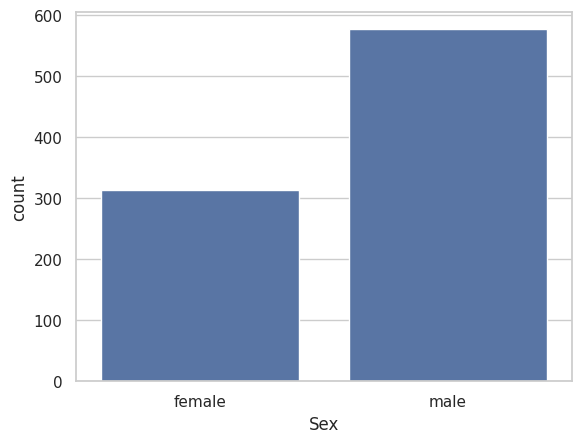

,proportion
Sex,
male,0.647587
female,0.352413


In [ ]:
sns.countplot(x='Sex',data=titanic)
plt.show()
titanic.Sex.value_counts(normalize=True)

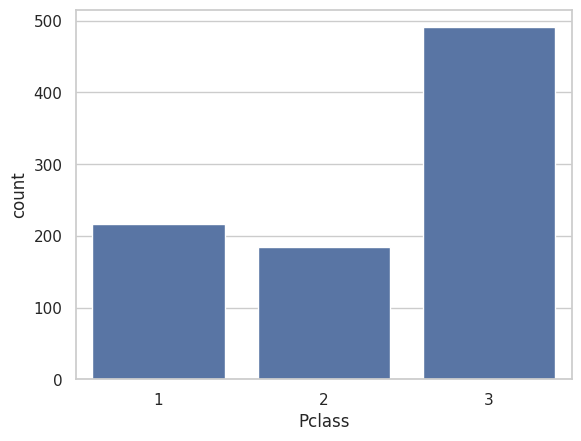

,proportion
Pclass,
3,0.551066
1,0.242424
2,0.206510


In [ ]:
sns.countplot(x='Pclass',data=titanic)
plt.show()
titanic.Pclass.value_counts(normalize=True)

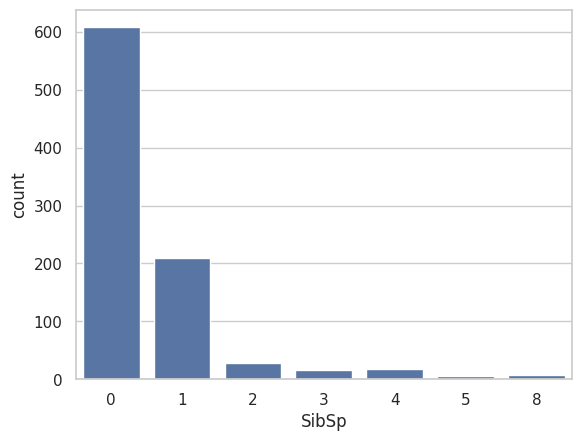

In [ ]:
sns.countplot(x='SibSp',data=titanic)
plt.show()

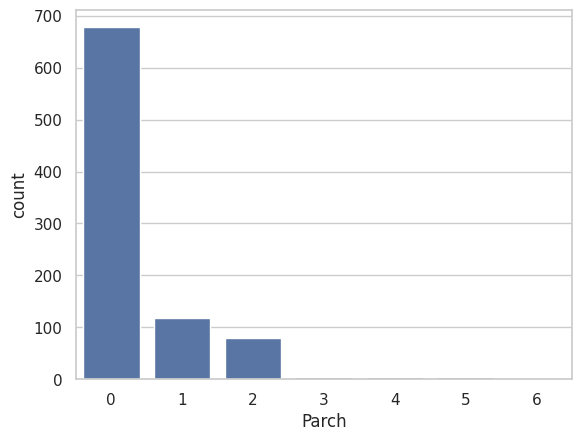

In [ ]:
sns.countplot(x='Parch',data=titanic)
plt.show()

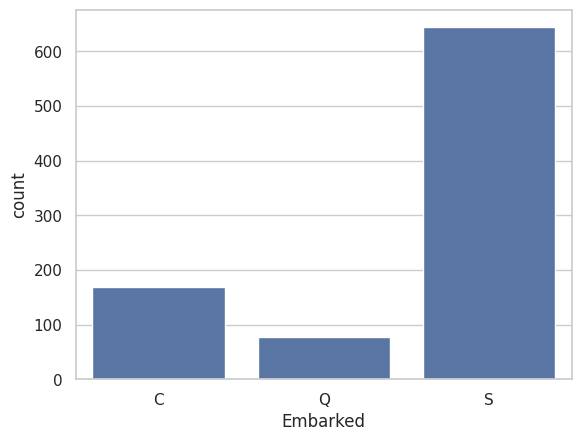

In [ ]:
sns.countplot(x='Embarked',data=titanic)
plt.show()

##BIVARIATE ANALYSIS

<Axes: xlabel='Pclass', ylabel='count'>

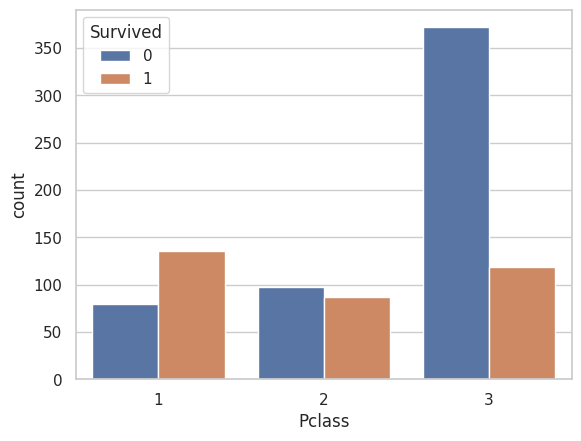

In [ ]:
sns.countplot(x="Pclass",hue='Survived',data = titanic)

:

### Bivariate Analysis: Survival vs. Passenger Class (Pclass)

1. **Overall Observations:**
   - **Pclass 1:** Higher survival rate.
   - **Pclass 2:** Moderate survival rate.
   - **Pclass 3:** Lower survival rate.

2. **Pclass 1 (First Class):**
   - **Survived:** A relatively large number of passengers in the first class survived. The count of survivors (orange bar) is significantly higher than the non-survivors (blue bar).
   - **Not Survived:** The count of non-survivors is lower compared to survivors in this class.

3. **Pclass 2 (Second Class):**
   - **Survived:** There is a notable number of survivors in the second class, but the count is lower than that in the first class.
   - **Not Survived:** The number of non-survivors is also lower than the survivors, indicating a decent survival rate.

4. **Pclass 3 (Third Class):**
   - **Survived:** The number of survivors in the third class is significantly lower compared to the other classes.
   - **Not Survived:** The count of non-survivors is the highest among all classes. This indicates that the third class had the lowest survival rate.

5. **Key Insights:**
   - There is a clear trend that the survival rate decreases as the passenger class moves from first to third class.
   - First-class passengers had a significantly higher chance of survival compared to second and third-class passengers.
   - Third-class passengers faced the highest mortality rate during the Titanic disaster.


In [ ]:
titanic.groupby('Pclass')['Survived'].value_counts(normalize = True).mul(100).rename('Percentage')

Pclass  Survived
1       1           62.962963
        0           37.037037
2       0           52.717391
        1           47.282609
3       0           75.763747
        1           24.236253
Name: Percentage, dtype: float64

- 62 % of first class passengers survived
- 52% of second class passengers survived.
- 24% passengers of third class survived.


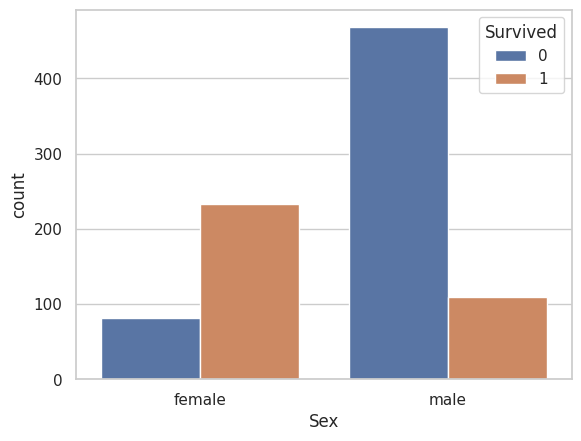

In [ ]:
sns.countplot(x='Sex',hue=titanic['Survived'], data=titanic)
plt.show()

In [ ]:
titanic.groupby('Sex')['Survived'].value_counts(normalize = True).mul(100).rename('Percentage')

Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Percentage, dtype: float64

<Axes: xlabel='Sex', ylabel='Count'>

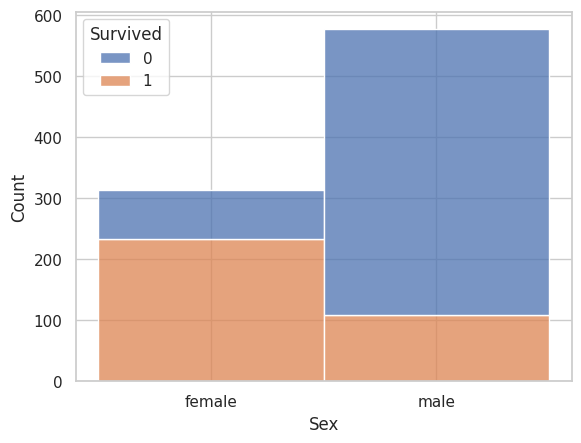

In [ ]:
sns.histplot(data=titanic, x="Sex", hue="Survived", multiple="stack")


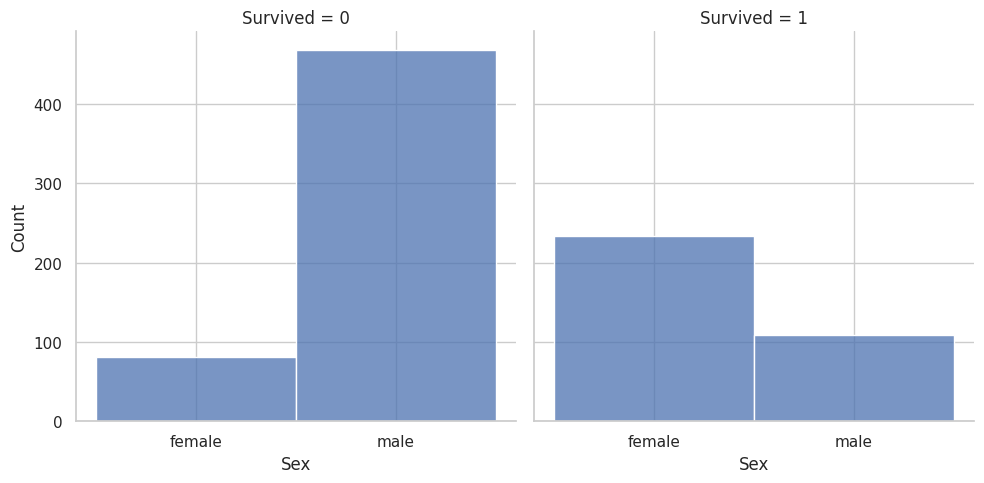

In [ ]:
sns.displot(data=titanic, x="Sex", col="Survived")


In [ ]:
#Lets get the actual counts:
titanic.groupby("Survived")['Sex'].value_counts(normalize = True)

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: proportion, dtype: float64

In [ ]:
titanic.Sex.value_counts()

,count
Sex,
male,577
female,314


Observations-

 - Out of 577 Male passengers 468 died.
 - Out of 314 Female passengers 81 died.


 - So in conclusion we can say a male passenger has a higher chance to die and female passengers have a higher chance to survive.

- Or Because of the Ladies First policy, priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

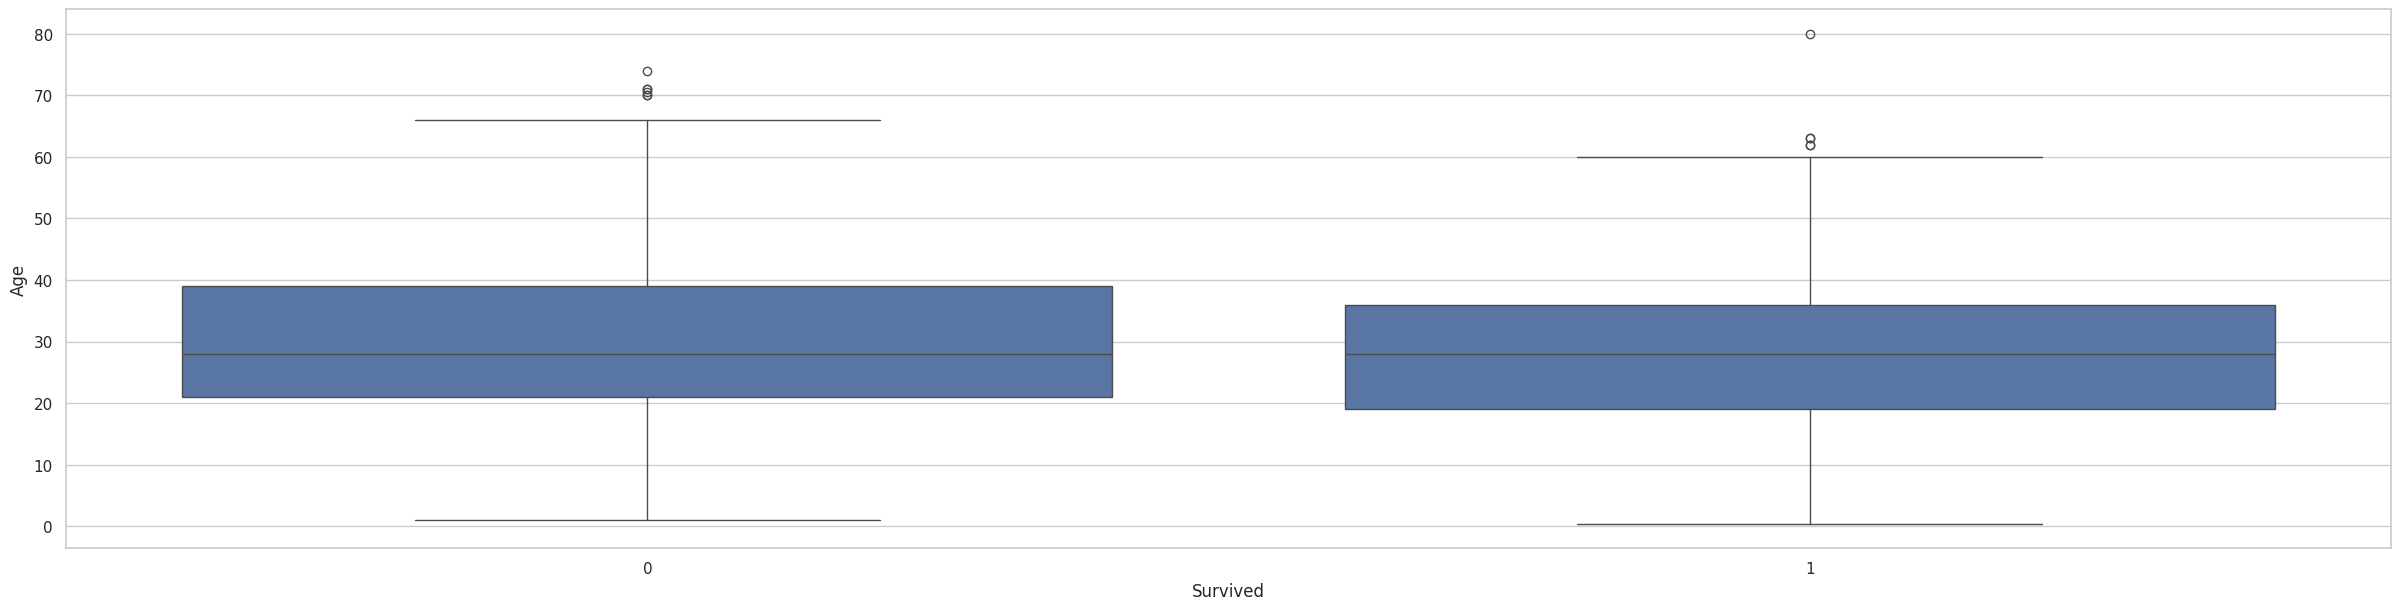

In [ ]:
plt.figure(figsize=(30,7))
sns.boxplot(x='Survived',y='Age', data=titanic)
plt.show()

In [3]:
sns.displot(data=titanic, x='Age', hue='Survived', bins=30)


NameError: name 'sns' is not defined

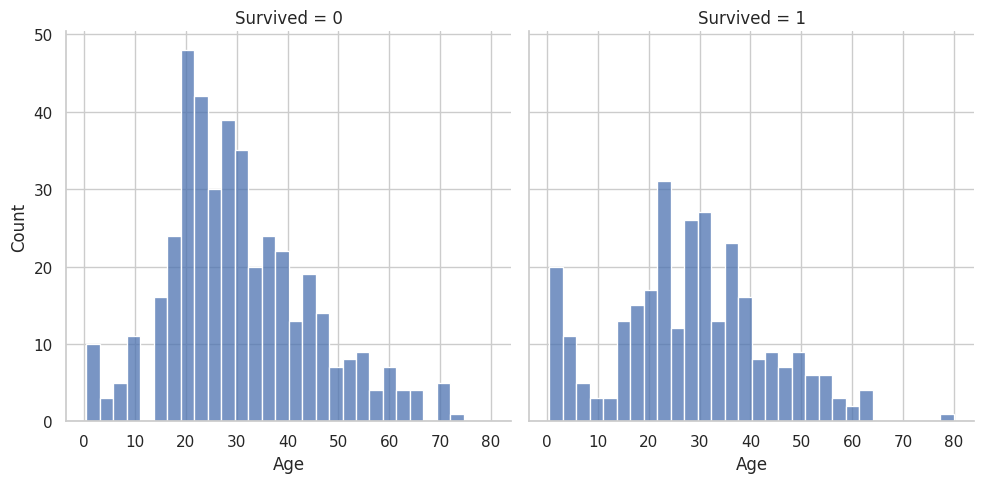

In [ ]:
sns.displot(data=titanic, x='Age', col='Survived', bins=30)


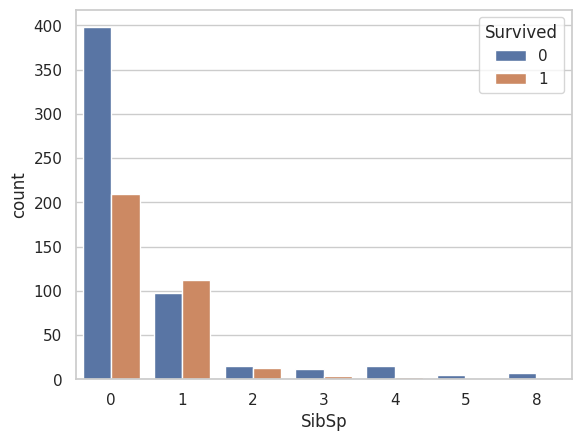

In [ ]:
sns.countplot(x='SibSp',hue=titanic['Survived'], data=titanic)
plt.show()

In [ ]:
400/600

0.6666666666666666


### Bivariate Analysis: Survival vs. Number of Siblings/Spouses Aboard (SibSp)

1. **Overall Observations:**
   - **SibSp 0:** Higher count of non-survivors.
   - **SibSp 1:** Balanced counts of survivors and non-survivors.
   - **SibSp 2 and above:** Fewer passengers overall, with varying survival rates.

2. **SibSp 0:**
   - **Survived:** There are survivors (orange bar), but the count is lower compared to non-survivors.
   - **Not Survived:** The highest count of non-survivors is in this category. Many passengers traveling alone did not survive.

3. **SibSp 1:**
   - **Survived:** The count of survivors is almost equal to non-survivors, indicating a higher survival rate compared to those with no siblings/spouses aboard.
   - **Not Survived:** The number of non-survivors is also significant but balanced with the survivors.

4. **SibSp 2:**
   - **Survived:** There are fewer survivors compared to SibSp 0 and 1, but the count is still notable.
   - **Not Survived:** The count of non-survivors is similar to survivors, indicating a mixed survival rate.

5. **SibSp 3 and above:**
   - **Survived:** Very few survivors, with only small counts observed for SibSp 3, 4, 5, and 8.
   - **Not Survived:** The counts of non-survivors in these categories are also very low, indicating fewer passengers in these categories.

6. **Key Insights:**
   - Passengers with no siblings/spouses aboard (SibSp 0) had the highest mortality rate.
   - Passengers with one sibling/spouse aboard (SibSp 1) had a higher chance of survival compared to those with no siblings/spouses.
   - The survival rates for passengers with two or more siblings/spouses aboard (SibSp 2 and above) are lower, but the data is sparse for these categories.

The countplot effectively visualizes how the number of siblings/spouses aboard impacted the survival rates of passengers. It shows that having at least one sibling or spouse aboard was associated with a higher chance of survival compared to traveling alone.

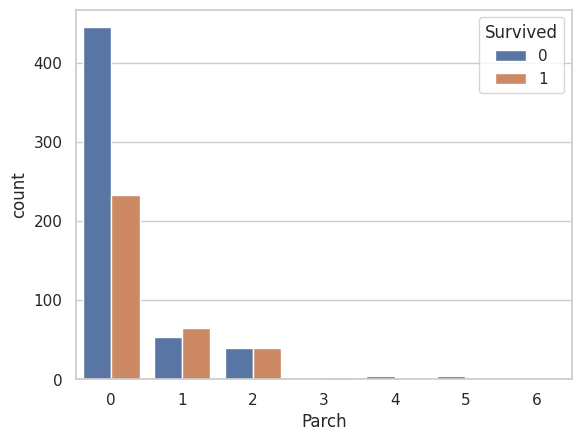

In [ ]:
sns.countplot(x='Parch',hue=titanic['Survived'], data=titanic)
plt.show()

In [ ]:
titanic.groupby('Parch')['Survived'].value_counts(normalize = True).mul(100).rename('Percentage')

Parch  Survived
0      0            65.634218
       1            34.365782
1      1            55.084746
       0            44.915254
2      0            50.000000
       1            50.000000
3      1            60.000000
       0            40.000000
4      0           100.000000
5      0            80.000000
       1            20.000000
6      0           100.000000
Name: Percentage, dtype: float64

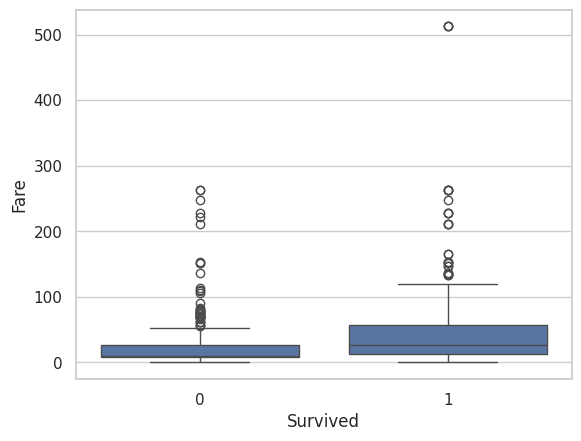

In [ ]:
sns.boxplot(y='Fare',x='Survived', data=titanic)
plt.show()

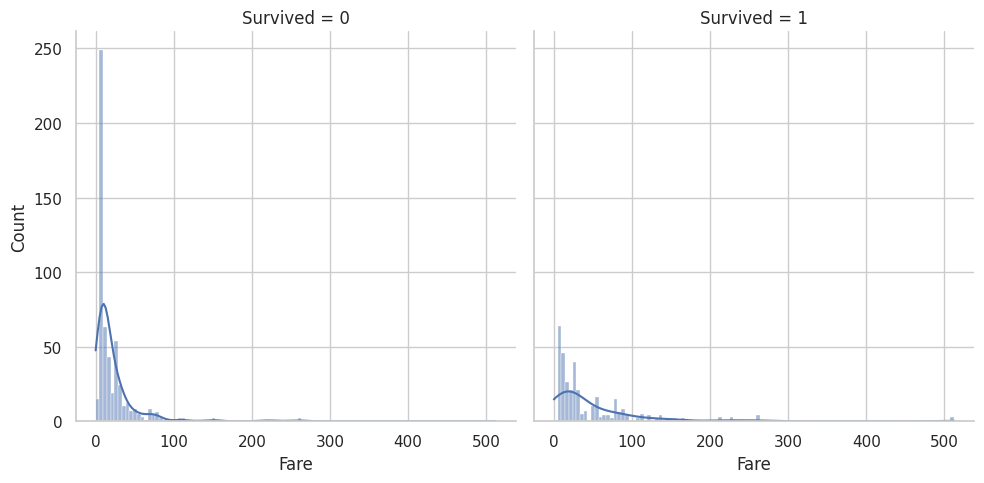

In [ ]:
sns.displot(data=titanic, x='Fare', col='Survived', kde=True)


<Axes: xlabel='Survived', ylabel='Fare'>

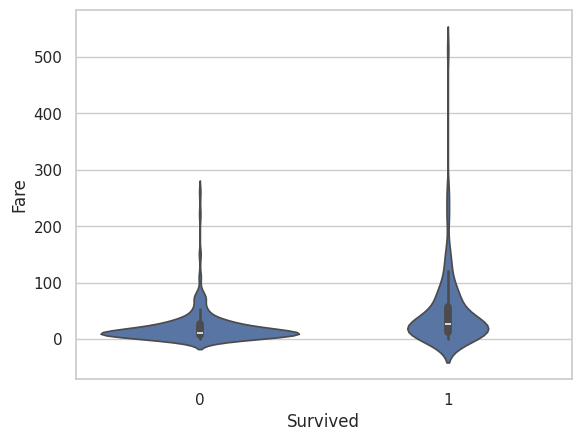

In [ ]:
sns.violinplot(x='Survived', y='Fare', data=titanic)


Bivariate analysis of fare versus survivors in the Titanic dataset provides insights into how fare prices influenced survival rates among passengers.

## Key Findings

1. **Survival Rates by Fare**:
   - Passengers who paid higher fares generally had higher survival rates. This is attributed to the fact that first-class passengers, who paid significantly more, had better access to lifeboats and were prioritized during evacuations. For instance, about 63% of first-class passengers survived compared to only 24% of those in third class.

2. **Fare Distribution**:
   - The fare distribution is highly skewed, with many passengers paying low fares and a few paying significantly higher amounts. This skewness can affect statistical analyses and may require transformations (e.g., log transformation) to normalize the data for better modeling outcomes

Higher median among the survivors for the fare distribution. This is consistent with the previous finding that the higher classes were favoured.
There is an extreme outlier that survived which probably corresponds to a very rich person.

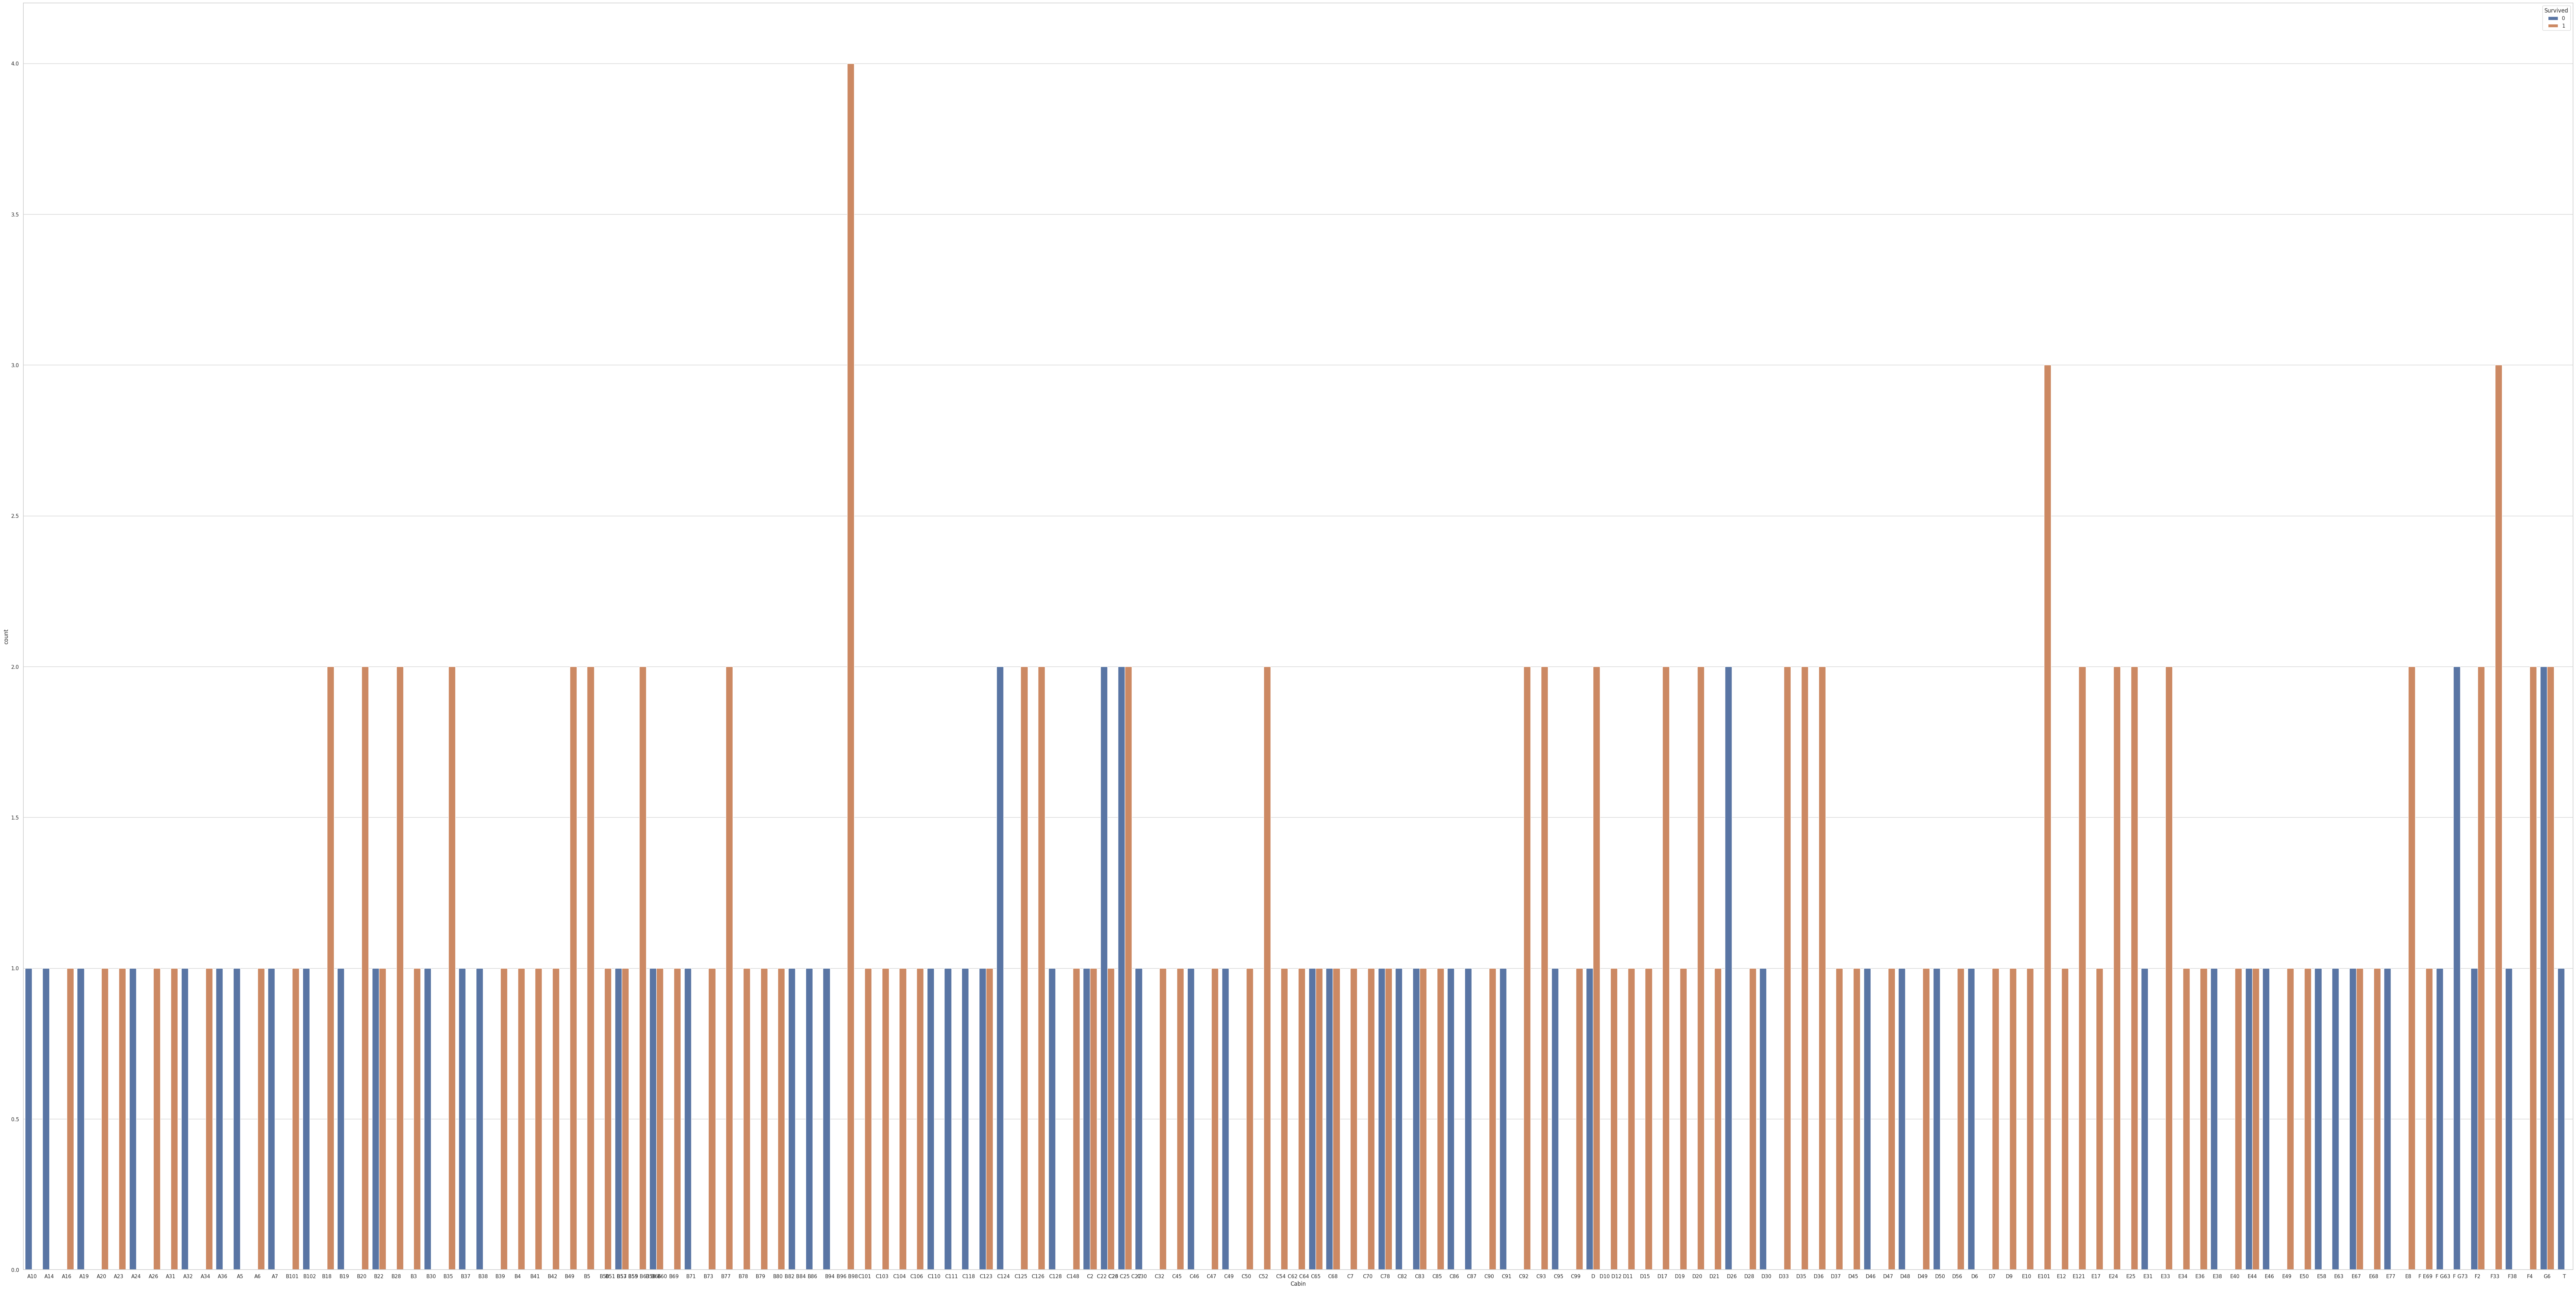

In [ ]:
plt.figure(figsize=(100,50))
sns.countplot(x='Cabin',hue=titanic['Survived'], data=titanic)
plt.show()

In [ ]:
titanic.groupby("Survived")['Cabin'].value_counts()

Survived  Cabin      
0         C124           2
          C22 C26        2
          C23 C25 C27    2
          D26            2
          F G73          2
                        ..
1         E77            0
          F G63          0
          F G73          0
          F38            0
          T              0
Name: count, Length: 294, dtype: int64

In [ ]:
titanic.groupby("Survived")['Cabin'].value_counts()

Survived  Cabin  
0         D26        2
          C22 C26    2
          G6         2
          C124       2
          F G73      2
                    ..
1         B30        0
          B37        0
          B38        0
          B71        0
          T          0
Name: count, Length: 294, dtype: int64

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Cabin Data Characteristics:
The cabin variable has many missing values, as not all passengers had their cabin numbers recorded. This can limit the effectiveness of the analysis. However, the available cabin data can still provide insights into survival rates based on cabin class (e.g., first, second, third class) and location (e.g., upper versus lower decks).
- Survival Rates by Cabin Class:
Passengers in higher-class cabins (first class) generally had higher survival rates compared to those in lower-class cabins (third class). This trend is consistent with other variables such as passenger class and fare, where socioeconomic status played a significant role in survival chances.
- Location Impact:
The proximity of cabins to lifeboats may also influence survival rates. Passengers located in cabins closer to the upper decks, where lifeboats were more accessible, tended to have better survival outcomes

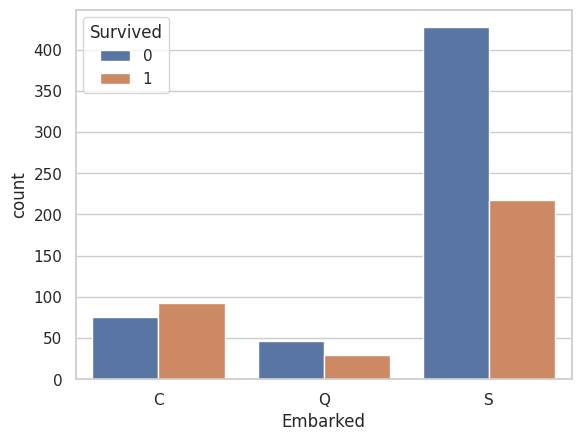

In [ ]:
sns.countplot(x='Embarked',hue=titanic['Survived'], data=titanic)
plt.show()

In [ ]:
print('\nEmpirical percentages')
titanic.groupby('Embarked')['Survived'].value_counts(normalize = True).mul(100).rename('Percentage')


Empirical percentages


Embarked  Survived
C         1           55.357143
          0           44.642857
Q         0           61.038961
          1           38.961039
S         0           66.304348
          1           33.695652
Name: Percentage, dtype: float64

In [ ]:
titanic.groupby('Pclass')['Embarked'].value_counts(normalize = True)

Pclass  Embarked
1       S           0.593458
        C           0.397196
        Q           0.009346
2       S           0.891304
        C           0.092391
        Q           0.016304
3       S           0.718941
        Q           0.146640
        C           0.134420
Name: proportion, dtype: float64

- It seems that the majority of passengers from Cherbourg were first class
- whereas the majority of embarkers from Queenstown and Southampton were third class.
- This could explain the effect of Embarked over Survived at least partially.

<Axes: xlabel='Pclass', ylabel='Fare'>

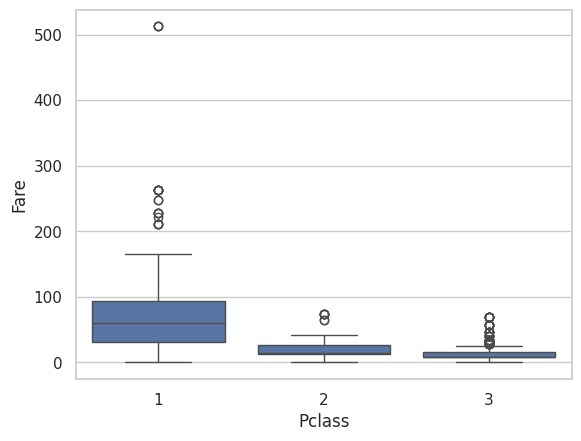

In [ ]:
sns.boxplot(data = titanic,
            y = 'Fare',
            x = 'Pclass')

This boxplot shows the relationship between class and Fare. We can see that the first class is very differenciated from the rest, whereas there is not much different between second and third class fare.

###Correlation (only for numerical columns):
data.corr(), sns.heatmap(data.corr(), annot=True)

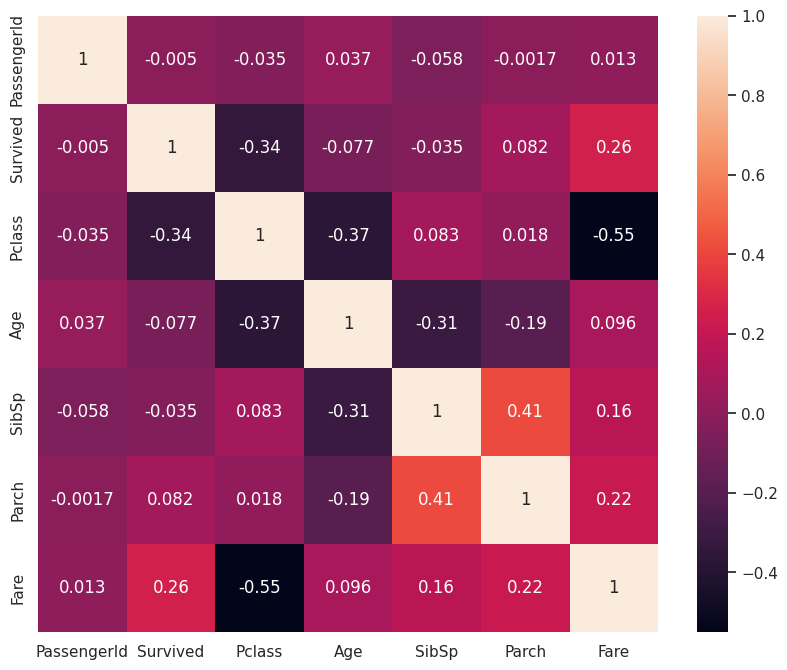

In [ ]:

# Exclude categorical columns
numerical_data = titanic.select_dtypes(include=[np.number])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

##MULTIVARIATE ANALYSIS

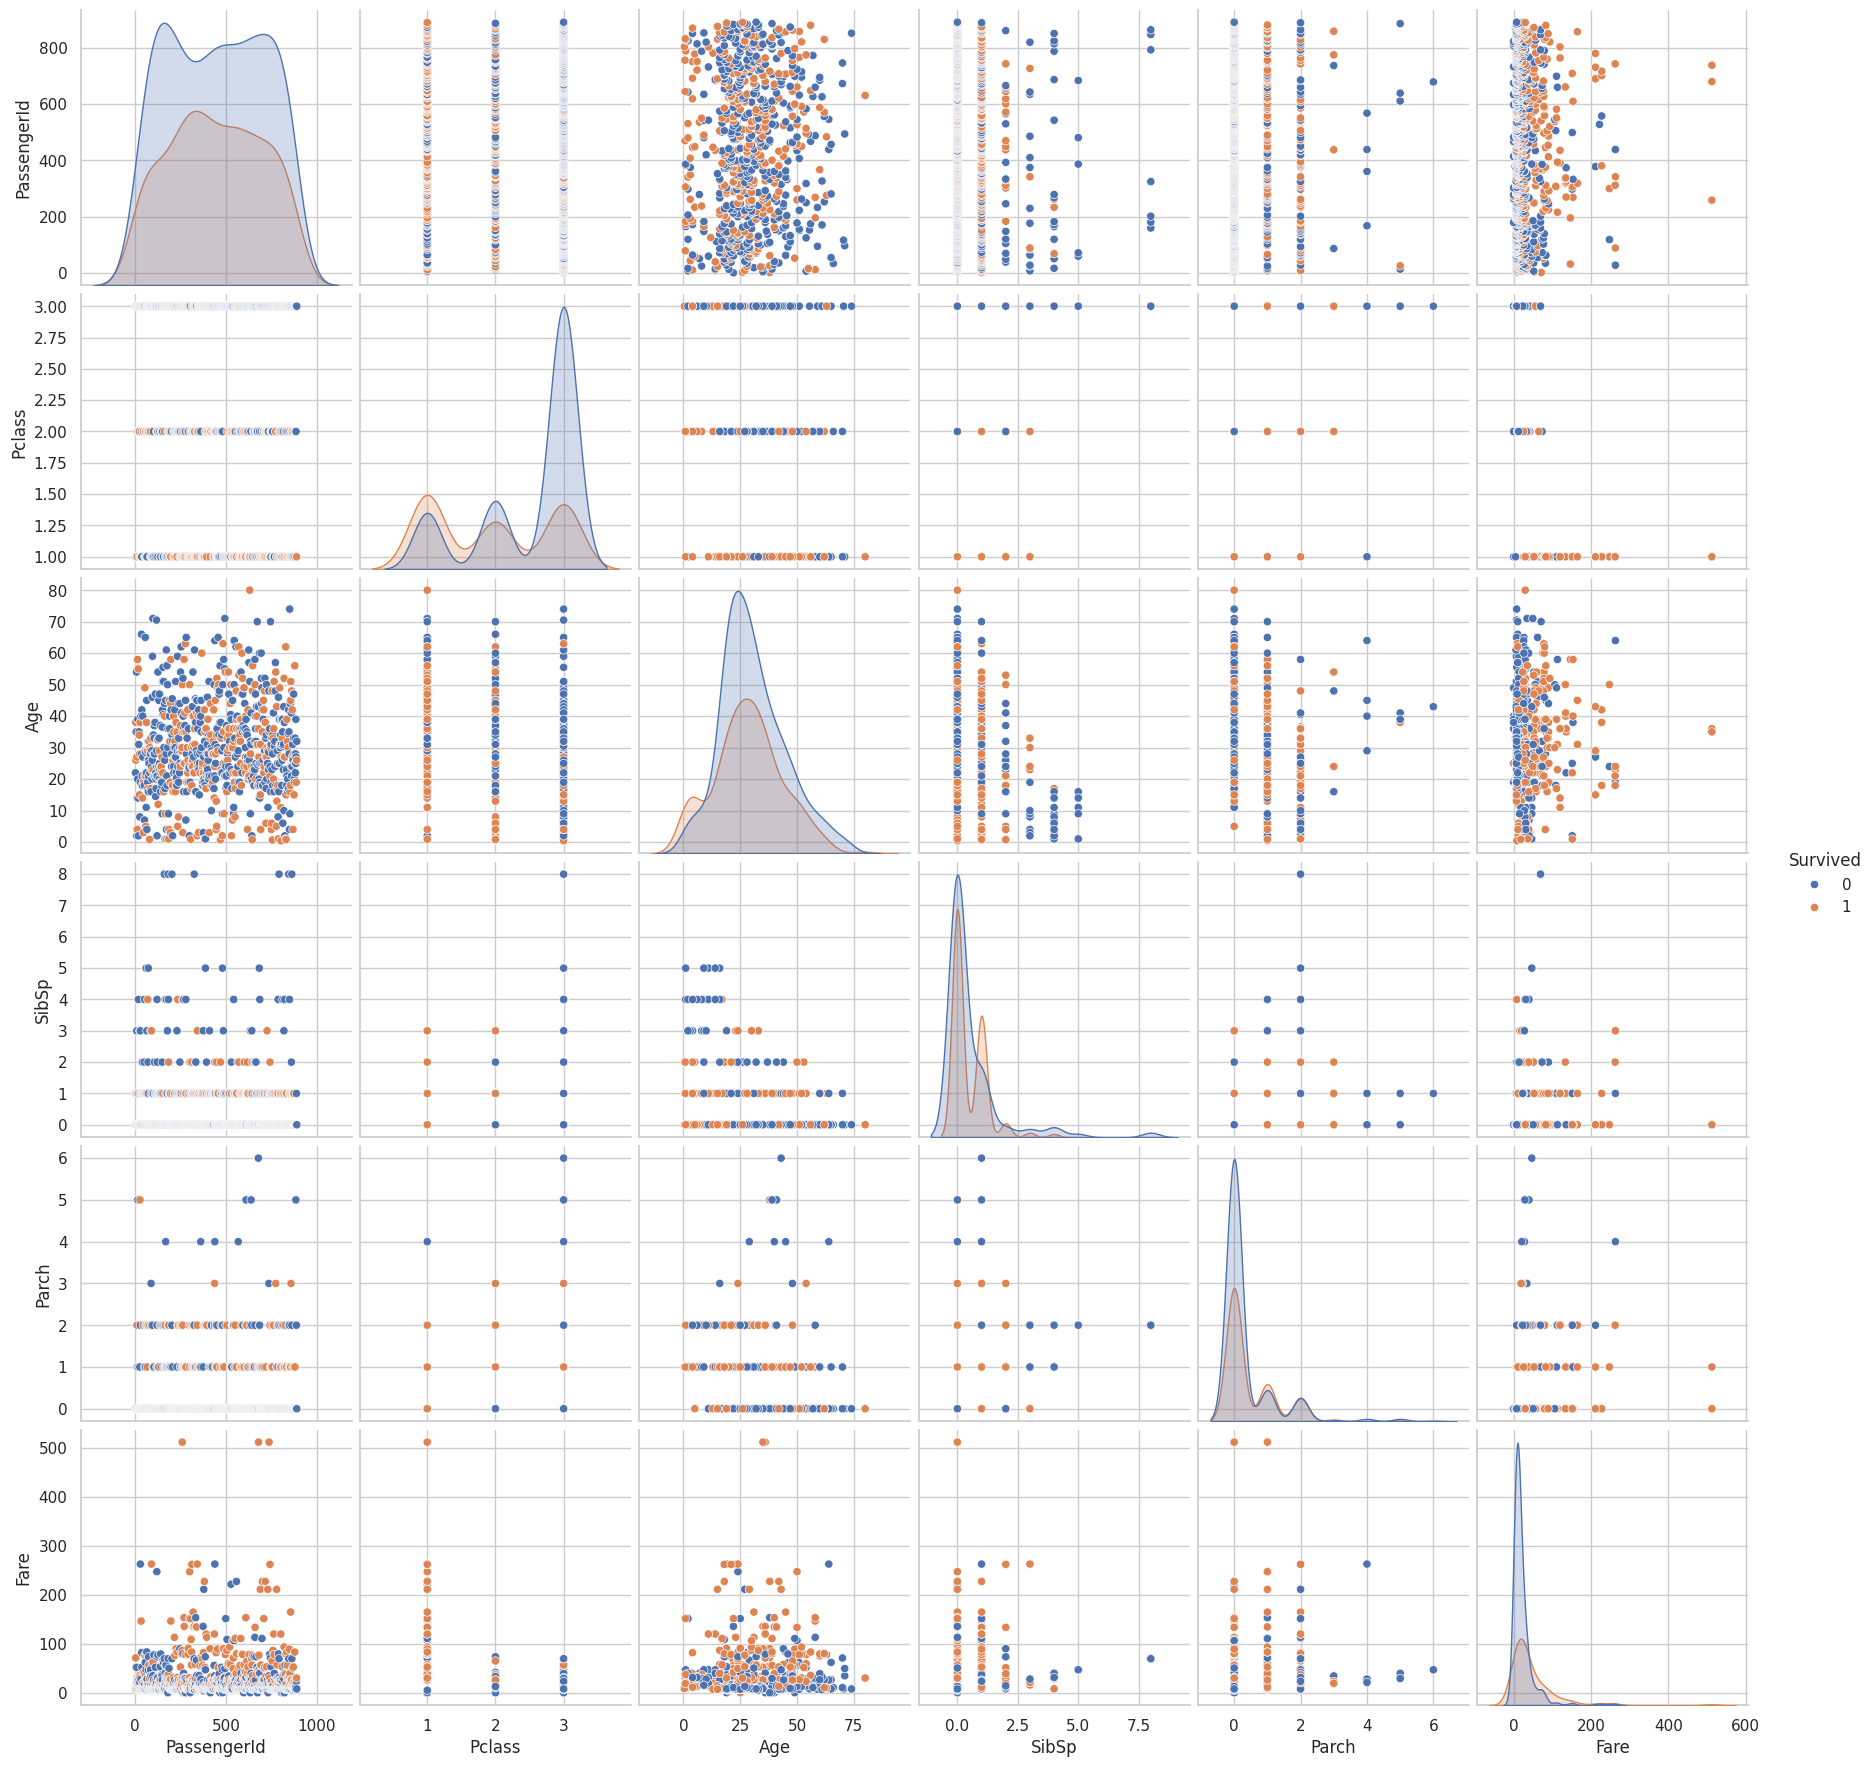

In [ ]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(titanic, hue="Survived", size=3);
plt.show()

Observations-

From the above grid of plots, we can see that passengers who paid higher fares or traveling in the upper class have a higher chance to survive.
Age is also giving some info like young persons have a higher chance to survive than old peoples.
The picture is not very clear with pair plots so let's go towards uni-variate analysis to understand what exactly is happening.

The exploratory data analysis (EDA) of the Titanic dataset yields several significant observations that help understand the factors influencing passenger survival. Here’s a summary of the major findings:

## Key Observations

1. **Gender Impact**:
   - Females had a significantly higher survival rate compared to males. This suggests that women were prioritized during the evacuation process, reflecting societal norms of the time

2. **Passenger Class**:
   - Survival rates varied greatly by passenger class. First-class passengers had the highest survival rates, followed by second-class, and then third-class passengers. This indicates that socioeconomic status played a crucial role in survival chances

3. **Embarkation Points**:
   - Passengers who embarked from different ports exhibited varying survival rates. Those who boarded at Cherbourg had the highest survival rates, while Southampton passengers had lower survival rates. This could be related to the demographics and class distributions of passengers at each port[2][4].

4. **Family Size**:
   - The analysis revealed that passengers traveling alone had lower survival rates. Conversely, larger family sizes (particularly those greater than five) correlated with decreased survival chances, possibly due to difficulties in evacuation

5. **Fare Paid**:
   - There is a positive correlation between the fare paid and survival rates. Passengers who paid higher fares tended to have better access to lifeboats and were more likely to survive

6. **Age Factor**:
   - Age also influenced survival, with children having a better chance of survival compared to adults. This may reflect the prioritization of children during the evacuation

7. **Missing Data**:
   - The dataset contains missing values, particularly in the Age and Cabin columns. Strategies for handling these missing values, such as imputing Age based on titles extracted from names, were discussed

8. **Variable Importance**:
   - Variables like Sex, Pclass, and Age were identified as significant predictors of survival in subsequent modeling efforts, highlighting their importance in understanding survival dynamics

## Conclusion

The EDA of the Titanic dataset underscores the complex interplay of factors such as gender, class, and age in determining survival outcomes during the disaster. The insights gained from this analysis not only inform predictive modeling efforts but also enhance our understanding of the social dynamics at play during the Titanic tragedy.
